In [84]:
import re #regex
import os #operating system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm



In [85]:
directory = 'csv/nvprof_perfomances'
files = []
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if (re.match("^fwb_dev_v_.*", filename)) and (not re.match("^fwb_dev_v_.*_pitch.*", filename)):
      files.append(file_path)
      print(file_path)

csv/nvprof_perfomances/fwb_dev_v_1_0__n_080__b_08__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_080__b_16__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_1200__b_08__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_1200__b_16__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_1200__b_24__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_160__b_08__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_160__b_16__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_160__b_32__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_240__b_08__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_240__b_16__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_240__b_24__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_320__b_08__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_320__b_16__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_320__b_32__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_480__b_08__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0__n_480__b_16__t_10.csv
csv/nvprof_perfomances/fwb_dev_v_1_0_

In [86]:
# for filename in files :
#     f = open(filename, "r")
#     print(f.read())
#     f.close()

In [87]:
def obtain_parameter(in_string, par_name) :
    par_regex = "-" + par_name + "=[^ \n]*"
    par_string = re.search(par_regex, in_string).group()
    par_value = re.sub(".*=", "", par_string)
    return par_value

def obtain_version(in_string) :
    par_regex = "v_[^. ]*"
    par_string = re.search(par_regex, in_string).group()
    par_value = re.sub("v_", "", par_string)
    return par_value

In [88]:
def obtain_all_parameters(in_file) :
    with open(in_file) as fp :
      for i, line in enumerate(fp) :
        if i == 0 :
            n = int(obtain_parameter(line, "n"))
            b = int(obtain_parameter(line, "b"))
            t = int(obtain_parameter(line, "t"))
            s = int(obtain_parameter(line, "s"))
            version = obtain_version(line)

        elif i == 3 :
            headers = line.replace('"', '').replace("\n", "").split(",")

        elif i == 4 :
            temp = line.replace("\n", "").replace("%", "").split(",")
            unit_measures = []
            for unit in temp :
              if unit != "" :
                unit = "(" + unit + ")"
              unit_measures.append(unit)

        elif i > 4 :
            break

    headers = list(map(lambda x, y: x + y, headers, unit_measures))

    return n, b, t, s, version, headers

In [89]:
def print_large(df) :
    with pd.option_context('display.max_columns', None, 'expand_frame_repr', False):
        print(df)

In [90]:
df_nvprof_big = pd.DataFrame()     # collects all data
df_nvprof = pd.DataFrame()   # sums up everything
for filename in files : 
    #print(filename)
    n, b, t, s, version, headers = obtain_all_parameters(filename)
    time = headers[2]
    temp_df_big = pd.read_csv(filename, skiprows=5, names=headers)
    temp_df_big['version'] = version
    temp_df_big['n'] = n
    temp_df_big['b'] = b
    temp_df_big['tests'] = t
    temp_df_big['seed'] = s
    if df_nvprof.empty :
      df_nvprof_big = pd.DataFrame(columns = headers)
      df_nvprof = pd.DataFrame(columns = ['version', 'n', 'b', 'tests', 'seed', time])
    df_nvprof_big = pd.concat([df_nvprof_big, temp_df_big])
    tot_time = temp_df_big[time].sum()
    #print(f"version = {version}, n = {n}, b = {b}, t = {t}, tot_time = {tot_time:.2f}")
    df_nvprof.loc[-1] = [version, n, b, t, s, tot_time]  # adding a row
    df_nvprof.index = df_nvprof.index + 1  # shifting index
    df_nvprof = df_nvprof.sort_index()  # sorting by index
df_nvprof = df_nvprof.sort_values(by = ['n', 'b', 'seed', 'tests', time])


In [91]:
#GPU, API in detail
print_large(df_nvprof_big)

              Type    Time(%)   Time(ms)  Calls   Avg(ms)   Min(ms)   Max(ms)                                               Name version      n     b  tests       seed
0   GPU activities  99.856998  50.120426  10000  0.005012   0.00384  0.013217  execute_round_device_v_1_0(int*, int, int, int...     1_0   80.0   8.0   10.0  8543799.0
1   GPU activities   0.084858   0.042592     10  0.004259  0.004192  0.004544                                 [CUDA memcpy HtoD]     1_0   80.0   8.0   10.0  8543799.0
2   GPU activities   0.058144   0.029184     10  0.002918  0.002848  0.003168                                 [CUDA memcpy DtoH]     1_0   80.0   8.0   10.0  8543799.0
3        API calls  67.155106  50.012157  10000  0.005001  0.003363  1.410444                                   cudaLaunchKernel     1_0   80.0   8.0   10.0  8543799.0
4        API calls  17.048004  12.696093    300   0.04232  0.003372  0.142958                              cudaDeviceSynchronize     1_0   80.0   8.0   10.0  85

In [92]:
#total sum per each (version,n,b,seed)
done = False
if not done :
    df_nvprof[time] = df_nvprof[time] / df_nvprof['tests']
    done = True
print(df_nvprof)


    version     n   b  tests     seed     Time(ms)
143     1_3    80   8     10  8543799     1.944642
167     1_2    80   8     10  8543799     1.951211
119     2_0    80   8     10  8543799     1.956054
95      2_1    80   8     10  8543799     1.973130
191     1_1    80   8     10  8543799     1.988931
..      ...   ...  ..    ...      ...          ...
139     1_3  1200  24     10  8543799    79.802977
43      4_0  1200  24     10  8543799    84.353618
187     1_1  1200  24     10  8543799   188.394056
19      4_1  1200  24     10  8543799   210.727276
211     1_0  1200  24     10  8543799  6632.728863

[216 rows x 6 columns]


In [93]:
df_chrono = pd.read_csv('csv/chrono_performances.csv')
done = False
if not done :
    df_chrono['Mean Squared Error(%)'] = df_chrono['Mean Squared Error(%)'].str.strip('%').astype(float) / 100
    done = True
print(df_chrono)

    version     seed     n   b   t    Time(ms)  Mean Squared Error(ms)  \
0       1_1  2249566    80   8  10    2.488727                7.844977   
1       1_1  2249566    80  16  10    1.196620                2.559030   
2       1_1  2249566   160   8  10    2.107333                2.531096   
3       1_1  2249566   160  16  10    2.080602                2.520659   
4       1_1  2249566   160  32  10    2.471117                2.817402   
..      ...      ...   ...  ..  ..         ...                     ...   
211     4_1  2249566   720  16  10   24.907030                3.067804   
212     4_1  2249566   720  24  10   21.258087                2.694765   
213     4_1  2249566  1200   8  10  120.046289                7.262712   
214     4_1  2249566  1200  16  10   75.605229                3.599830   
215     4_1  2249566  1200  24  10   68.839749                5.693063   

     Mean Squared Error(%)  
0                 3.152205  
1                 2.138549  
2                 1.2010

In [94]:
na_columns = df_nvprof_big.columns[df_nvprof_big.isna().any()].tolist()
if na_columns == [] :
    print("No NaN values found")
else :
    print("Columns with NaN:")
    print(na_columns)

No NaN values found


In [95]:
versions_to_remove = [ '1_0'] #, '1_1', '1_2', '1_3', '4_0', '4_1']
versions = np.unique(df_nvprof['version'])
versions = versions.tolist()
versions = [ elem for elem in versions if elem not in versions_to_remove]
print(versions)

['2_0', '2_1', '3_0']


In [96]:
sizes_to_remove = [  ]
sizes = np.unique(df_nvprof['n'])
sizes = sizes.tolist()
sizes = [ elem for elem in sizes if elem not in sizes_to_remove]
print(sizes)

[80, 160, 240, 320, 480, 640, 720]


In [97]:
def plot_perf_version(df, y_axis, analyzer, versions=versions) :
    x_axis = 'n'
    rows = 2
    cols = 2
    fig, axis = plt.subplots(rows, cols, figsize=(15, 10))
    idx = 0
    df_filtered = df[df['version'].isin(versions)]
    df_filtered = df_filtered[df_filtered['n'].isin(sizes)]
    title = y_axis + " performance of versions with " + analyzer
    fig.suptitle(title,  fontsize=16)
    max_y = max(df_filtered[y_axis])
    max_x = max(df_filtered[x_axis])
    for b in range(8, 33, 8):
        i = (int) (idx / cols)
        j = (int) (idx % cols)
        df_plot = df_filtered[(df_filtered['b'] == b)]
        for label, grp in df_plot.groupby(['version']):
            sub_title = "Blocking Factor = " + str(b)
            grp.plot(ax=axis[i][j], kind='line', x=x_axis, y=y_axis, xlabel='Matrix Size', ylabel=y_axis, label=label, title=sub_title, ylim=(0,max_y), xlim=(0,max_x), marker='o', grid=True)
        idx += 1

    out_filename = 'png/' + title + '.png'
    plt.savefig(out_filename, facecolor='white', transparent=False)

In [98]:
def plot_perf_B(df, y_axis, analyzer, versions=versions) :
    rows = 2
    cols = 4
    fig, axis = plt.subplots(rows, cols, figsize=(25, 10))
    idx = 0
    df_filtered = df[df['version'].isin(versions)]
    df_filtered = df_filtered[df_filtered['n'].isin(sizes)]
    title = y_axis + " performance of blocking factors with " + analyzer
    fig.suptitle(title,  fontsize=16)
    max_y = max(df_filtered[y_axis])
    for v in versions:
        i = (int) (idx / cols)
        j = (int) (idx % cols)
        df_plot = df_filtered[(df_filtered['version'] == v)]
        for label, grp in df_plot.groupby(['b']):
            sub_title = "version = " + v
            grp.plot(ax=axis[i][j], kind='line', x='n', y=y_axis, xlabel='Matrix Size', ylabel=y_axis, label=label, title=sub_title, ylim=(0,max_y), marker='o', grid=True)
        idx += 1

    out_filename = 'png/' + title + '.png'
    plt.savefig(out_filename, facecolor='white', transparent=False)

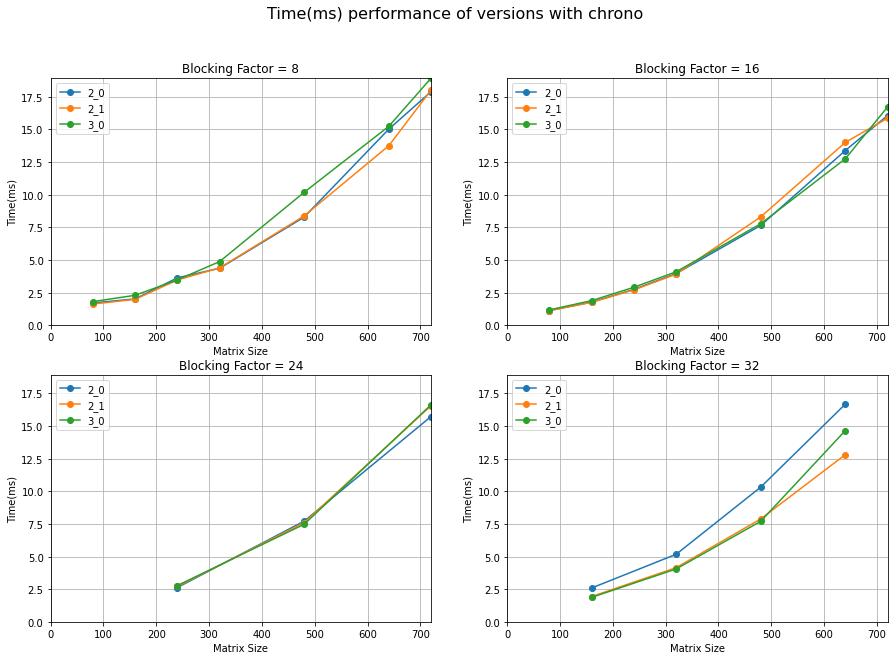

In [99]:
plot_perf_version(df_chrono, 'Time(ms)', 'chrono')

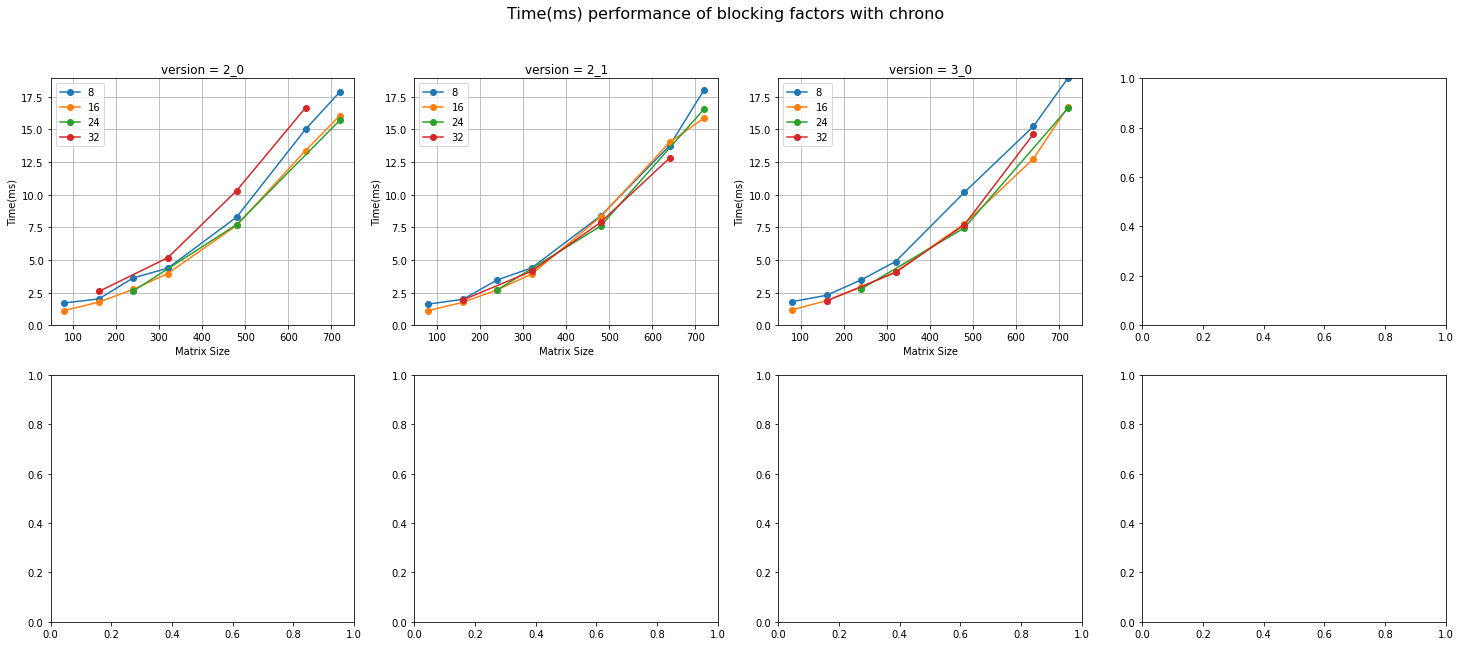

In [100]:
plot_perf_B(df_chrono, 'Time(ms)', 'chrono')

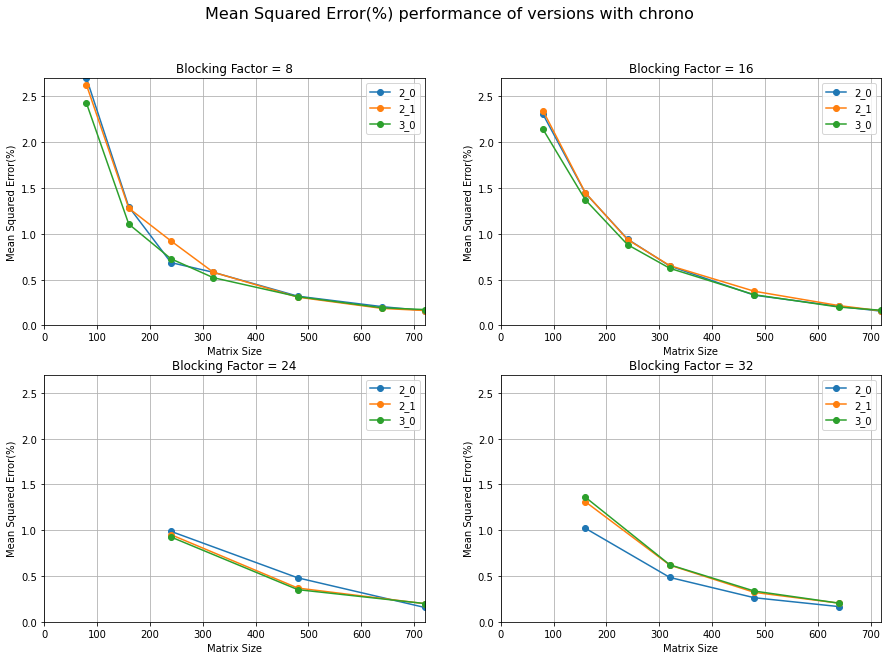

In [101]:
plot_perf_version(df_chrono, 'Mean Squared Error(%)', 'chrono')

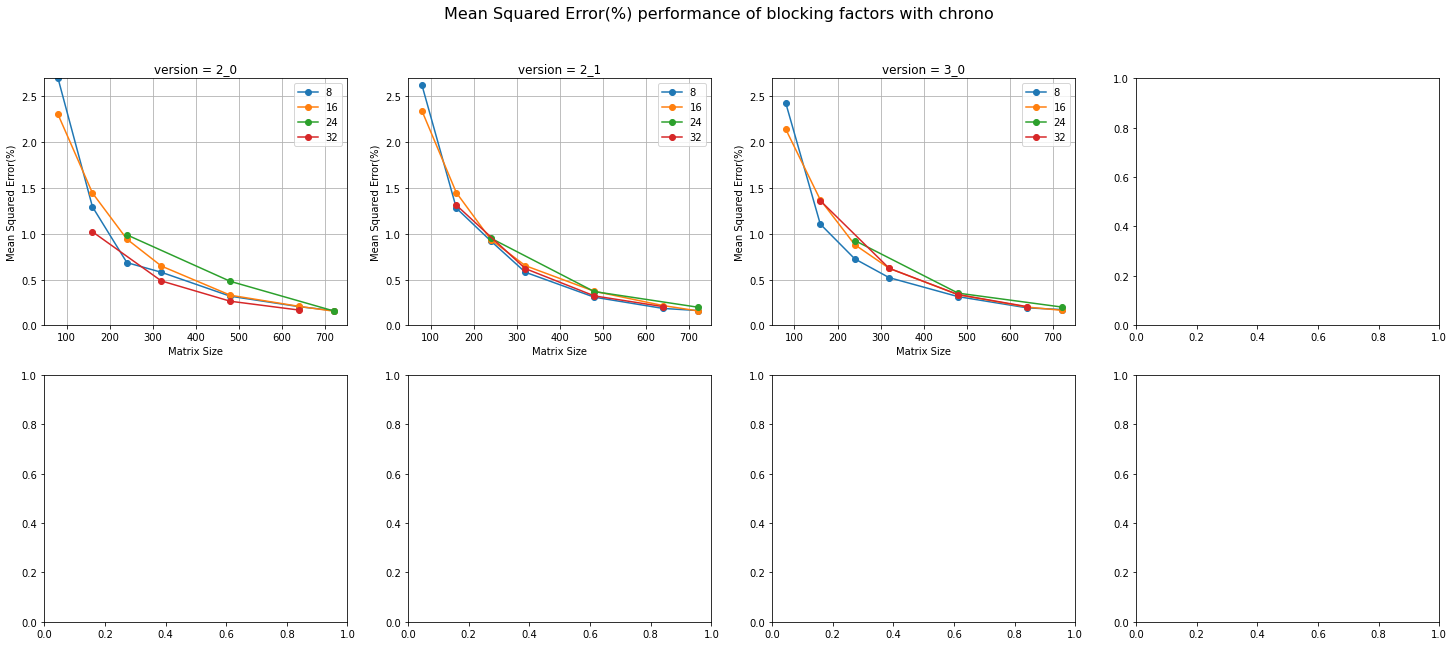

In [102]:
plot_perf_B(df_chrono, 'Mean Squared Error(%)', 'chrono')

In [ ]:
# set x axis
#df_filtered.set_index(x_axis, inplace=True)
# set y axis
#df_filtered.groupby(groupby)[y_axis].plot(
    # set params
#    grid=True,
#    figsize=(8, 8),
#    legend=True,
#    title = y_label + " performance of blocking factors with " + analyzer,
#    xlabel = x_label,
#    ylabel = y_label,
#    marker='o'
#)

In [115]:
def plot_per_B_one_version(df, groupby, x_axis, x_label, y_axis, y_label, analyzer, version, trend_line=False):

    # filter df
    df_filtered = df[(df['version'] == version)]
    df_filtered = df_filtered[df_filtered['n'].isin(sizes)]

    # identify groups
    groups = np.unique(df_nvprof[groupby])
    
    # set x axis
    df_filtered.set_index(x_axis, inplace=True)
    
    # create plot
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # generate colors
    colors = cm.rainbow(np.linspace(0, 1, len(groups)))
    
    i = 0
    
    for label, grp in df_filtered.groupby(groupby)[y_axis] :

        grp.plot(ax=ax, kind='line', x='n', y=y_axis, xlabel=x_label, ylabel=y_axis, label=label, marker='o', grid=True, legend=True, color = colors[i])
        
        title = y_label + " performance of blocking factors with " + analyzer
        plt.title(title)
        
        if trend_line :
            grp = grp.reset_index()
            z = np.polyfit(grp[x_axis], grp[y_axis], 1)
            p = np.poly1d(z)
            
            #add trendline to plot
            plt.plot(grp[x_axis], p(grp[x_axis]), '--', color = colors[i])
        
        i += 1
            
    out_filename = 'png/' + y_label + ' group by ' + groupby + '.png'
    plt.savefig(out_filename, facecolor='white', transparent=False)

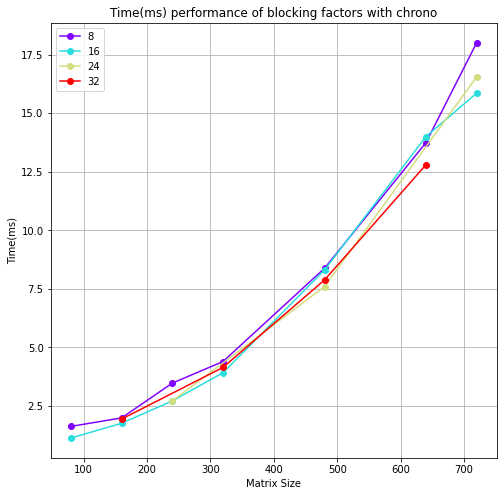

In [116]:
plot_per_B_one_version(df_chrono, groupby='b', x_axis='n', x_label='Matrix Size', y_axis=time, y_label=time, analyzer='chrono', version='2_1')

In [117]:
mean_time = 'Mean Time(us) per cell'
df_chrono[mean_time] = 1000 * df_chrono[time] / (df_chrono['n'] ** 2)

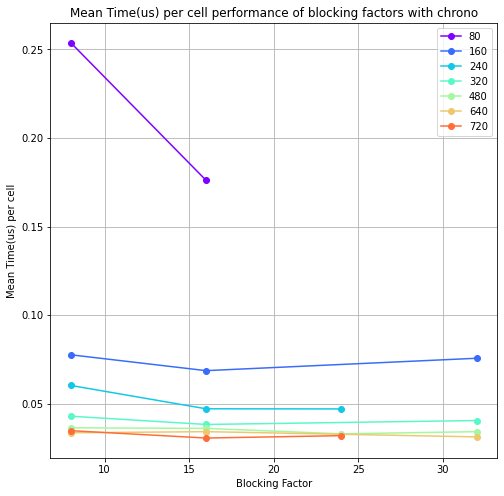

In [118]:
plot_per_B_one_version(df_chrono, groupby='n', x_axis='b', x_label='Blocking Factor', y_axis=mean_time, y_label=mean_time, analyzer='chrono', version='2_1')#, trend_line=True)

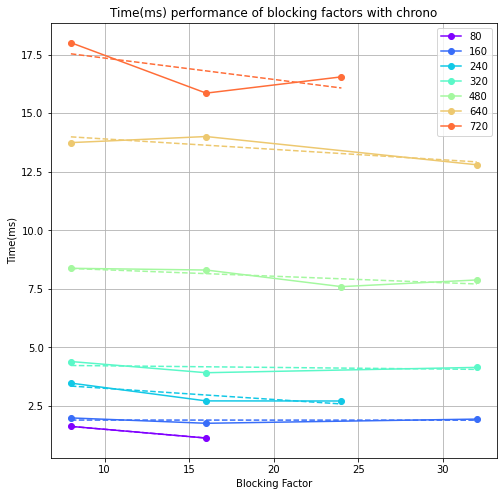

In [119]:
plot_per_B_one_version(df_chrono, groupby='n', x_axis='b', x_label='Blocking Factor', y_axis=time, y_label=time, analyzer='chrono', version='2_1', trend_line=True)